[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/USERNAME/REPO/blob/BRANCH/PATH/TO/NOTEBOOK.ipynb)

**This notebook generates a one-dimensional Hamiltonian of a infinite well and solves it with a finite difference method**

To start our journey on the quantum properties of 2D materials, let us do the basics and try to solve the time-independent schrodinger equation of a particle in an infinite well:


$$H\psi(x)=E\psi(x)$$

where

$$H=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}$$

for $V(x)=0$ inside the well. For simplicity, $t=\hbar/2ma$. Our finite difference approximation to the second derivative operator is $H_n=t[\psi(n-1)-2\psi(n)+\psi(n+1)]$ (see https://en.wikipedia.org/wiki/Finite_difference)

The analytical result is given by

$E_n=t(\pi n a/L)^2$

and the numerical result will be valid for small values of $n$ or $n\pi a/L \ll 1$.

Below, we import the necessary python packages including numpy for math, matplotlib for the graphics and seaborn for nice graphics


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


Hamiltonian matrix definition where L is the size of the box

In [ ]:
L = 301
t = 1  # hbar/(2ma^2)
H = [
    [
        2 * t if (i == j) else -t if (j == (i + 1)) else -t if (j == (i - 1)) else 0
        for i in range(L)
    ]
    for j in range(L)
]


In [ ]:
#diagonalization read np.linalg.eigen for details
en, v = np.linalg.eigh(H)

Text(0, 0.5, '$E_n$(t)')

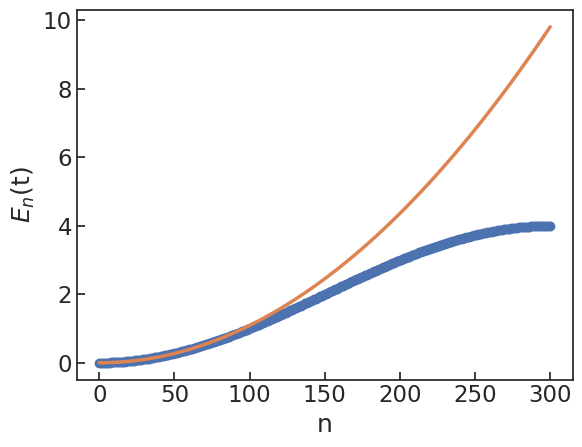

In [ ]:
# plot numerical and analytical energies
k = np.pi * np.arange(L) / (L)
plt.plot(en, "o-")
plt.plot(k * k, "-")
plt.xlabel("n")
plt.ylabel("$E_n$(t)")


Text(0, 0.5, '$\\psi^2(x)$')

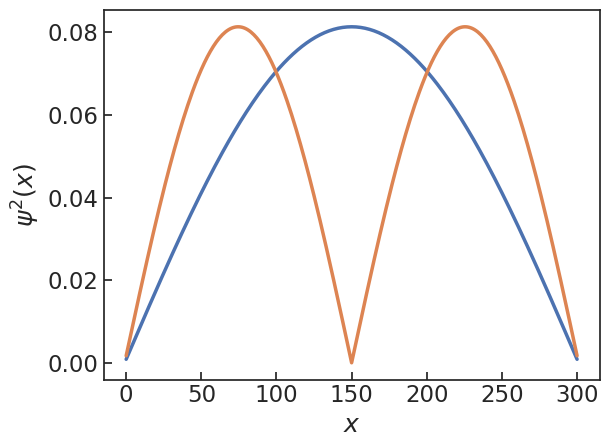

In [ ]:
# Probability function
v0 = v[:,0]
psi2 = np.sqrt(v * np.conj(v))
plt.plot(psi2[0])
plt.plot(psi2[1])
plt.xlabel('$x$')
plt.ylabel('$\psi^2(x)$')



### Periodic conditions

We can now modify the Hamiltonian, which is valid for a 1D tight-binding model as well if we include periodic boundary conditions

In [ ]:
Hp = H
Hp[0][L - 1] = t
Hp[L - 1][0] = t


In [ ]:
ep, vp = np.linalg.eigh(Hp)

(0.0, 300.0)

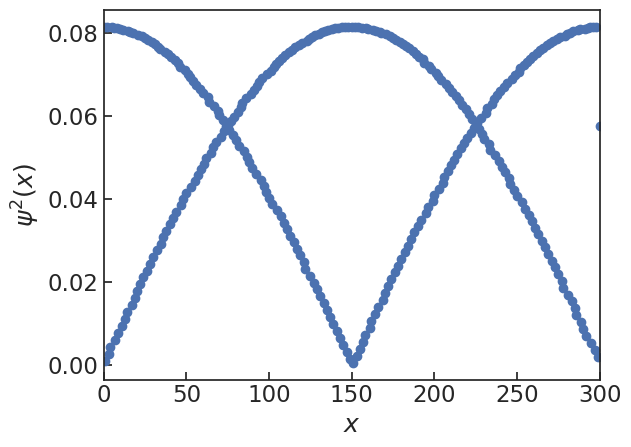

In [ ]:
psi2 = np.sqrt(vp * np.conj(vp))
plt.plot(psi2[1],marker='o',linestyle = 'None')
plt.xlabel('$x$')
plt.ylabel('$\psi^2(x)$')
plt.xlim(0,300)

Whenever we have degenerate eigenstates, any linear combination of these eigenfunctions is also an eigenfunction with the same eigenvalue. So we can write the eigenstates as

$$\psi(x)=\psi_0 e^{ikx}$$

and

$k=2\pi n/L$ and $E=k^2/2m=2\pi^2n^2/mL^2$
